In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bulk Density CAF

In [3]:
df = pd.read_csv("./datasets./CAF_Sensor_Dataset_2./CAF_BulkDensity.txt", sep='\t')

In [4]:
df.head()

,Location,Depth,BulkDensity
0,CAF003,30,1.183
1,CAF003,60,1.191
2,CAF003,90,1.333
3,CAF003,120,1.433
4,CAF003,150,1.507


In [5]:
locations = df.Location.unique()

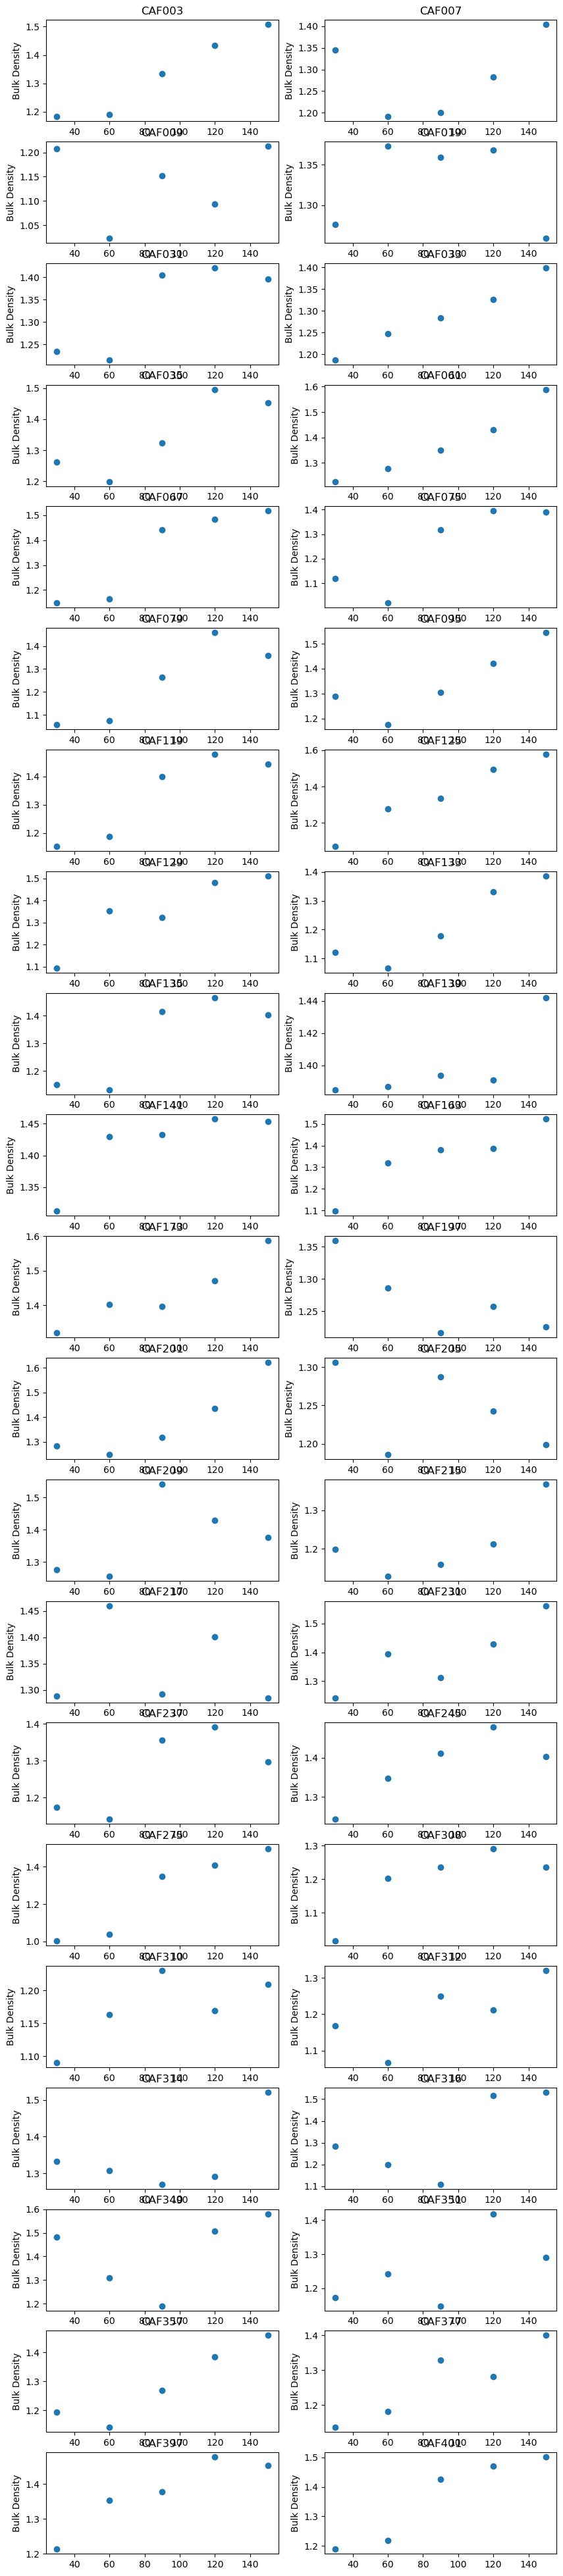

In [6]:
rows = len(locations)//2
plt.figure(figsize=(10,50))
for index,loc in enumerate(locations):
    plt.subplot(rows ,2, index+1)
    loc_data = df[df.Location==loc]
    plt.title(loc)
    plt.ylabel('Bulk Density')
    plt.scatter(loc_data.Depth, loc_data.BulkDensity)
    

In [7]:
corr_list = []
for loc in locations:
    loc_data = df[df.Location==loc]
    loc_data = loc_data.select_dtypes(exclude='O')
    corr_list.append(loc_data.corr().iloc[0,1])

In [8]:
hist, bins = np.histogram(corr_list, bins=10)
print("Bin Edges:", bins)
print("Histogram Counts:", hist)

Bin Edges: [-0.81508556 -0.63428152 -0.45347748 -0.27267344 -0.09186939  0.08893465
  0.26973869  0.45054273  0.63134677  0.81215081  0.99295486]
Histogram Counts: [ 1  1  0  2  0  1  2  3  8 24]


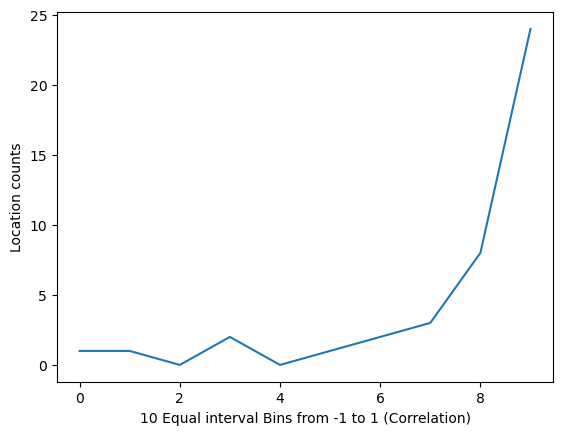

In [10]:
plt.ylabel('Location counts')
plt.xlabel('10 Equal interval Bins from -1 to 1 (Correlation)')
plt.plot(hist)